In [37]:
import pandas as pd

**Первая часть** предполагает работу с результатами опроса студентов Вышки, в ходе которого респондентам предлагалось выбрать наиболее интересных героев сказки «Не покидай...» на основе следующей информации:

* по предложенному текстовому описанию (как в пьесах, без подробностей, намекающих на развитие сюжета);
* по предложенным кадрам из фильма (актёры в образе героев в разных ситуациях).

По итогам опроса фиксировалось следующее: выбор героев по текстовому описанию (не более двух героев), итоговый выбор героев после ознакомления с кадрами из фильма (не более двух героев), лайки/дизлайки представленным образам героев. Ознакомиться с опросником, чтобы быть более погружённым в контекст задания, можно по [ссылке](https://forms.gle/GwfroJXuBXtrxH959). 

**Вторая часть** включает кластерный анализ полученных результатов опроса.


## Часть 1. Обработка данных (10 баллов)

В файле `NPK_24_last.xlsx` (скачать [здесь](https://disk.yandex.ru/i/_UJfWjvkb5EJ6w)) сохранены результаты опроса, описанного в начале этого файла:

* лист `описание`: выбор героев по текстовому описанию;
* лист `лайки`: лайки/дизлайки, поставленные на основе кадров;
* лист `итоговый выбор`: итоговый выбор героев.

Таблицы на всех листах обладают одинаковой структурой, в первых столбцах зафиксирован профиль обучения респондентов, уровень обучения, пол. В столбцах с именами основных героев сохранены бинарные индикаторы, отражающие факт выбора героя на разных этапах опроса:

* в таблицах `описание` и `итоговый выбор` значение 1 означает, что респондент проголосовал за героя, то есть выбрал его как интересного (можно было выбрать не более двух);

* в таблице `лайки` значение 1 соответствует лайку, значение 0 – дизлайку.

### Задача 1. Загружаем и агрегируем результаты опроса (2 балла)

Загрузите в Python данные с листа `итоговый выбор` файла `NPK_24_last.xlsx` и сохраните их в датафрейм `poll`. Выберите из `poll` столбцы, соответствующие основным героям сказки (с Теодора по Марселлу) и сохраните их в отдельный датафрейм `small`. 

Посчитайте число проголосовавших за каждого героя и сохраните результаты в виде объекта `res` типа *Series*. Отсортируйте значения по убыванию. Результат должен выглядеть так:

    Оттилия     107
    Патрик       67
    Марта        63
    Жак          62
    Давиль       61
    Альбина      24
    Теодор       22
    Марселла     21
    Пенапью      19
    Флора         7
    dtype: int64

In [38]:
poll = pd.read_excel("NPK_24_last.xlsx", sheet_name="итоговый выбор")

hero_columns = ['Теодор', 'Альбина', 'Давиль', 'Жак', 'Марта',
                'Оттилия', 'Патрик', 'Пенапью', 'Флора', 'Марселла']
small = poll[hero_columns]

res = small.sum().sort_values(ascending=False)

print(res)

Оттилия     107
Патрик       67
Марта        63
Жак          62
Давиль       61
Альбина      24
Теодор       22
Марселла     21
Пенапью      19
Флора         7
dtype: int64


### Задача 2. Визуализируем данные (2 балла)

Постройте столбиковую диаграмму, отражающую число проголосовавших за каждого из героев. На диаграмме должно быть 10 столбцов, упорядоченных по убыванию высоты. Измените цвета графика, скорректируйте подписи при необходимости.

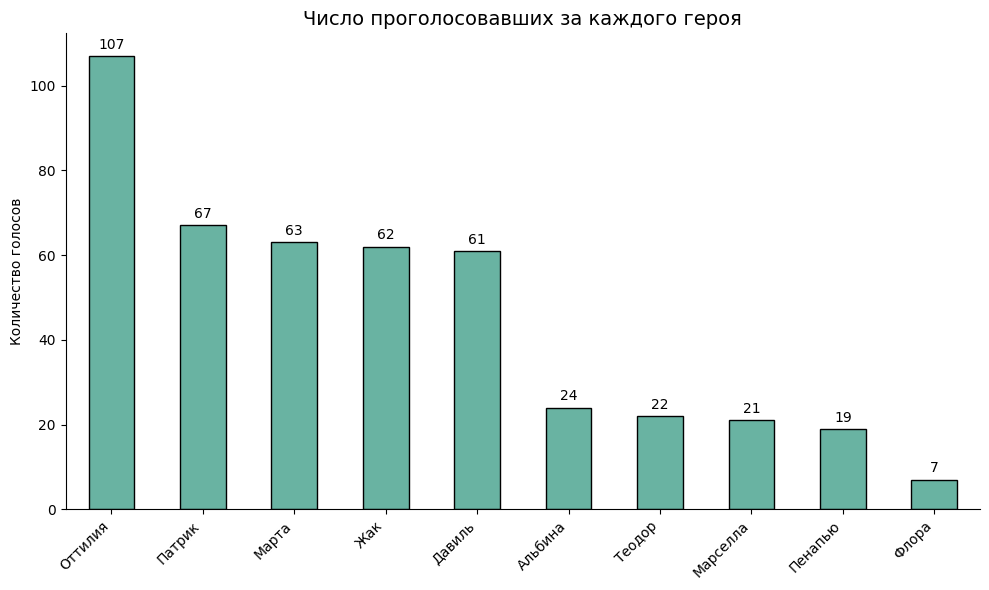

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
res.plot(kind='bar', color='#69b3a2', edgecolor='black')

plt.title('Число проголосовавших за каждого героя', fontsize=14)
plt.ylabel('Количество голосов')
plt.xticks(rotation=45, ha='right')

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

for i, v in enumerate(res):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


### Задача 3. Изучаем данные (2 балла)

1. Определите, любым способом, респондентов какого пола участвовало в опросе больше.
2. Выведите на экран перечень уникальных значений профилей студентов, которые участовали в опросе.

In [40]:
print(poll.columns[:5])

gender_counts = poll['пол'].value_counts()
print(gender_counts)

Index(['id', 'опрос', 'профиль', 'уровень', 'группа'], dtype='object')
пол
жен    120
муж    107
Name: count, dtype: int64


In [41]:
unique_profiles = poll['профиль'].unique()
print(unique_profiles)

['политология и управление' 'математика и информатика'
 'психология и педагогика' 'право и экономика' 'коммуникации и языки']


### Задача 4. Преобразуем данные (2 балла)

Добавьте в датафрейм `poll` столбец `профиль2` со следующими значениями:

* `социально-экономический`, если в профиле указаны значения `политология и управление`, `право и экономика`;
* `информационно-математический`, если в профиле указано значение `математика и информатика`;
* `другое`, если иное.

In [42]:
def categorize_profile(profile):
    if profile in ['политология и управление', 'право и экономика']:
        return 'социально-экономический'
    elif profile == 'математика и информатика':
        return 'информационно-математический'
    else:
        return 'другое'

In [43]:
poll['профиль2'] = poll['профиль'].apply(categorize_profile)

print(poll[['профиль', 'профиль2']].head())

                    профиль                 профиль2
0  политология и управление  социально-экономический
1  политология и управление  социально-экономический
2  политология и управление  социально-экономический
3  политология и управление  социально-экономический
4  политология и управление  социально-экономический


### Задача 5. Группируем данные (2 балла)

Выберите любых двух интересных вам героев и: 

* сгруппируйте строки в `poll` по значению столбца `профиль2` и определите, сколько студентов каждого профиля проголосовало за них;

* сгруппируйте строки в `poll` по значению столбца `пол` и определите, сколько студентов мужского и женского пола проголосовало за них;

* сгруппируйте строки в `poll` по значениям `профиль2` и `пол` сразу и выведите аналогичную выдачу на экран.

In [44]:
# Группировка по профиль2

group_by_profile = poll.groupby('профиль2')[['Оттилия', 'Марта']].sum()
print("Голоса по профилям:")
print(group_by_profile)

Голоса по профилям:
                              Оттилия  Марта
профиль2                                    
другое                              8      5
информационно-математический       28     19
социально-экономический            71     39


In [45]:
# Группировка по полу

group_by_gender = poll.groupby('профиль2')[['Оттилия', 'Марта']].sum()
print("\nГолоса по полу:")
print(group_by_gender)


Голоса по полу:
                              Оттилия  Марта
профиль2                                    
другое                              8      5
информационно-математический       28     19
социально-экономический            71     39


In [46]:
# Группировка по профилю и полу

group_by_profile_gender = poll.groupby(['профиль2', 'пол'])[['Оттилия', 'Марта']].sum()
print("\nГолоса по профилю и полу:")
print(group_by_profile_gender)


Голоса по профилю и полу:
                                  Оттилия  Марта
профиль2                     пол                
другое                       жен        6      3
                             муж        2      2
информационно-математический жен       16     10
                             муж        9      7
социально-экономический      жен       47     23
                             муж       24     16


## Часть 2: Иерархический кластерный анализ (15 баллов)

### Задача 1 (2 балла)

Загрузите данные из того же файла `NPK_24_last.xlsx` и сохраните их в датафреймы:

* данные с листа `описание` – в датафрейм `text`;
* данные с листа `итоговый выбор` – в датафрейм `final`.

Сохраните в датафреймы `text_cur` и `final_cur` строки из датафреймов `text` и `final`, которые соответствуют студентам, участвующих в сериях опроса 3, 4, 9, 10 (столбец `опрос`). Это будут сопоставимые группы студентов:

* `3` – 2 курс ОП «Бизнес-информатика» прошлого учебного года, `10` – 2 курс ОП «Бизнес-информатика» этого года;
* `4` – 1 курс ОП «Политология» прошлого года, `9` – 1 курс ОП «Политология» этого года.

In [47]:
text = pd.read_excel("NPK_24_last.xlsx", sheet_name="описание")
final = pd.read_excel("NPK_24_last.xlsx", sheet_name="итоговый выбор")

target_surveys = [3, 4, 9, 10]

text_cur = text[text['опрос'].isin(target_surveys)]
final_cur = final[final['опрос'].isin(target_surveys)]

### Задача 2 (1 балл)

Выберите из датафрейма `text_cur` столбцы, соответствующие основным героям сказки (с Теодора по Марселлу) и сохраните их в отдельный датафрейм `text_ans`. В датафрейме `text_ans` должно быть 10 бинарных столбцов.

In [48]:
hero_columns = ['Теодор', 'Флора', 'Альбина', 'Патрик', 'Пенапью',
                'Давиль', 'Оттилия', 'Жак', 'Марта', 'Марселла']

text_ans = text_cur[hero_columns]

print("Размерность:", text_ans.shape)

Размерность: (121, 10)


### Задача 3 (1 балл)

Используя данные `text_ans`, реализуйте иерархический кластерный анализ, выбрав в качестве метрики манхэттенское расстояние и метод средней связи в качестве метода агрегирования. Постройте дендрограмму. Поделите респондентов на три кластера, сохраните метки кластеров в столбец `clusters_bin` в датафрейм `text_cur`.

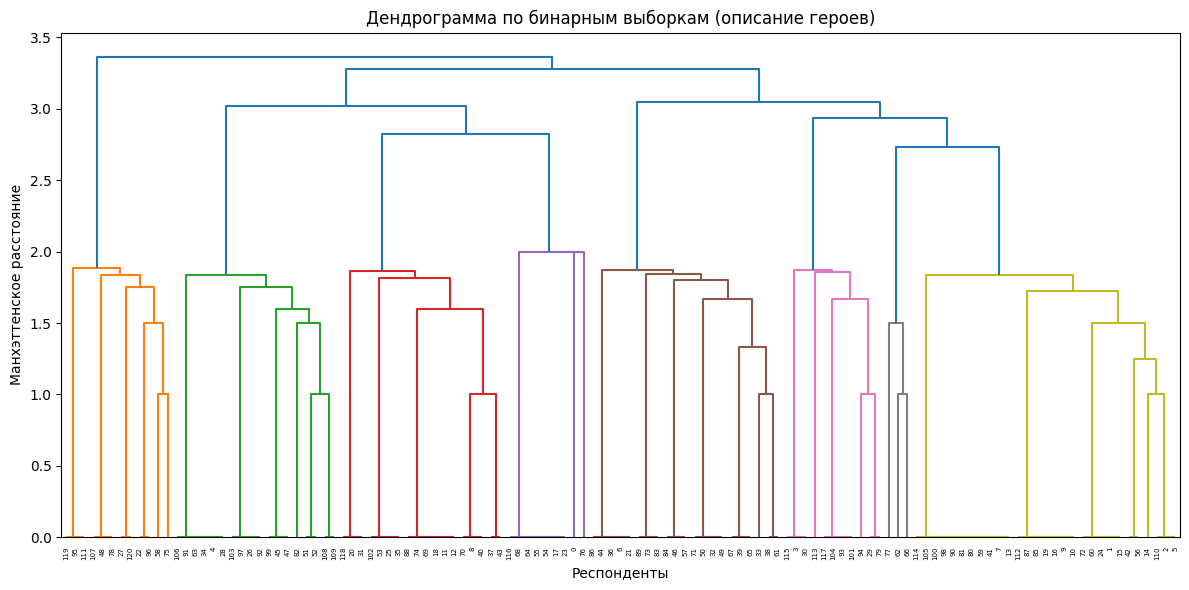

   опрос  clusters_bin
0      4             2
1      4             3
2      4             3
3      4             3
4      4             2


C:\Users\levko\AppData\Local\Temp\ipykernel_1664\3749917756.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_cur['clusters_bin'] = clusters


In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

Z = linkage(text_ans, method='average', metric='cityblock')

plt.figure(figsize=(12, 6))
dendrogram(Z, leaf_rotation=90)
plt.title("Дендрограмма по бинарным выборкам (описание героев)")
plt.xlabel("Респонденты")
plt.ylabel("Манхэттенское расстояние")
plt.tight_layout()
plt.show()

clusters = fcluster(Z, t=3, criterion='maxclust')

text_cur['clusters_bin'] = clusters

print(text_cur[['опрос', 'clusters_bin']].head())

### Задача 4 (2 балла)

Выберите строки `text_cur`, соответствующие каждому их трёх кластеров, и сохраните их в датафреймы `clust0`, `clust1` и `clust2`. Для каждого такого датафрейма посчитайте суммы значений по столбцам с именами героев и выведите топ-2, то есть имена двух самых популярных героев в каждом кластере. 

Прокомментируйте полученные результаты, объясните, можно ли считать, что выбор самых популярных героев обусловлен тематически (кластер «любителей власти», кластер ценящих «свободу духа» и подобное, тут свобода творчества уже у вас).

In [50]:
clust0 = text_cur[text_cur['clusters_bin'] == 1]
clust1 = text_cur[text_cur['clusters_bin'] == 2]
clust2 = text_cur[text_cur['clusters_bin'] == 3]

hero_columns = ['Теодор', 'Альбина', 'Давиль', 'Жак', 'Марта',
                'Оттилия', 'Патрик', 'Пенапью', 'Флора', 'Марселла']

print("Кластер 0:")
print(clust0[hero_columns].sum().sort_values(ascending=False).head(2))

print("\nКластер 1:")
print(clust1[hero_columns].sum().sort_values(ascending=False).head(2))

print("\nКластер 2:")
print(clust2[hero_columns].sum().sort_values(ascending=False).head(2))

Кластер 0:
Теодор    12
Давиль     3
dtype: int64

Кластер 1:
Давиль     24
Оттилия    18
dtype: int64

Кластер 2:
Жак      34
Марта    32
dtype: int64


Кластер 0 - Любители власти <br>
Кластер 1 - Свобода духа <br>
Кластер 2 - Мятежники

### Задача 5 (2 балла)

Изучите состав каждого кластера: любым разумным способом посчитайте (лучше в процентах), сколько в каждом кластере студентов женского/мужского пола, сколько представителей разных профилей. Опишите, есть ли какие-то особенности у полученных кластеров с точки зрения их состава по полу и профилю обучения.

In [51]:
def gender_distribution(df):
    return df['пол'].value_counts(normalize=True) * 100

print("Пол по кластерам (%):\n")
print("Кластер 0:\n", gender_distribution(clust0))
print("\nКластер 1:\n", gender_distribution(clust1))
print("\nКластер 2:\n", gender_distribution(clust2))

Пол по кластерам (%):

Кластер 0:
 пол
муж    66.666667
жен    33.333333
Name: proportion, dtype: float64

Кластер 1:
 пол
жен    58.536585
муж    41.463415
Name: proportion, dtype: float64

Кластер 2:
 пол
жен    58.333333
муж    41.666667
Name: proportion, dtype: float64


In [53]:
def profile_distribution(df):
    return df['профиль'].value_counts(normalize=True).mul(100).round(1)

print("\nПрофиль по кластерам (%):")
print("\nКластер 0:\n", profile_distribution(clust0))
print("\nКластер 1:\n", profile_distribution(clust1))
print("\nКластер 2:\n", profile_distribution(clust2))


Профиль по кластерам (%):

Кластер 0:
 профиль
математика и информатика    66.7
политология и управление    33.3
Name: proportion, dtype: float64

Кластер 1:
 профиль
политология и управление    53.3
математика и информатика    46.7
Name: proportion, dtype: float64

Кластер 2:
 профиль
политология и управление    56.2
математика и информатика    43.8
Name: proportion, dtype: float64


По данным кластерам можно сделать вывод, что мужчины больше предпочитают технические профили, а женщины гуманитарные.

### Задача 6 (1 балл)

По аналогии с задачей 2, выберите из датафрейма `final_cur` столбцы, соответствующие основным героям сказки (с Теодора по Марселлу) и сохраните их в отдельный датафрейм `final_ans`. В датафрейме `final_ans` должно быть 10 бинарных столбцов.

In [ ]:
heroes = ['Теодор', 'Альбина', 'Давиль', 'Жак', 'Патрик', 
          'Марта', 'Оттилия', 'Пенапью', 'Флора', 'Марселла']

final_ans = final_cur[heroes]

final_ans.head()

,Теодор,Альбина,Давиль,Жак,Патрик,Марта,Оттилия,Пенапью,Флора,Марселла
0,0,0,1,0,0,0,1,0,0,0
1,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1
4,0,0,1,0,0,0,1,0,0,0


### Задача 7 (1 балл)

Выбор героя по текстовому описанию, при условии, что он сделан осмысленно и обдуманно, отражает интересные респонденту архетипичные образы, в то время как итоговый выбор может зависеть от воплощения героев на экране, в частности, внешности актёров и выразительности их грима и костюмов. Поэтому, чтобы учесть оба выбора, но с разным весом, предлагается создать интегральный индекс одобрения героев:

    integral = 2 * text_ans + final_ans

Если запустить эту строку кода, в `integral` будут те же 10 столбцов, но уже со значениями от 0 до 3, где 0 – респондент не выбрал героя ни в начале, ни в конце опроса, 1 – респондент выбрал героя только в конце опроса, 2 – респондент выбрал героя только в начале опроса, 3 – респондент выбрал героя и в начале опроса, и в конце после просмотра кадров.

Используя данные `integral` (нормировать здесь не нужно), реализуйте иерархический кластерный анализ, выбрав в качестве метрики евклидово расстояние и метод Варда в качестве метода агрегирования. Постройте дендрограмму. Поделите респондентов на три кластера, сохраните метки кластеров в столбец `clusters_int` в датафрейм `text_cur`.

In [ ]:
### YOUR CODE HERE ###

### Задача 8 (4 балла)

Выберите строки `text_cur`, соответствующие каждому их трёх кластеров из предыдущей задачи, и сохраните их в датафреймы `clust0_int`, `clust1_int` и `clust2_int`. Для каждого такого датафрейма посчитайте суммы значений по столбцам с именами героев и выведите топ-2, то есть имена двух самых популярных героев в каждом кластере. 

Прокомментируйте полученные результаты, объясните, можно ли считать, что выбор самых популярных героев обусловлен тематически (кластер «любителей власти», кластер ценящих «свободу духа» и подобное, тут свобода творчества уже у вас).

Изучите состав каждого кластера: любым разумным способом посчитайте (лучше в процентах), сколько в каждом кластере студентов женского/мужского пола, сколько представителей разных профилей. Опишите, есть ли какие-то особенности у полученных кластеров с точки зрения их состава по полу и профилю обучения.

In [ ]:
### YOUR CODE HERE ###

### Задача 9 (1 балл)

Сравните результаты кластеризации из задач 3-4 (только на текстовом описании) и задач 7-8 (индекс от 0 до 3). Какая кластеризация вам кажется более осмысленной, наглядной? 

In [ ]:
### BLA-BLA-BLA